In [26]:
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

import matplotlib.pyplot as plt

In [2]:
# physical_devices = tf.config.experimental.list.physical_devices('GPU')
# print('Num GPUs Available: ', len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [3]:
# Maricopa county
maricopa = pd.read_csv("C:/Users/edoar/Documents/School_Documents/Fall_2021/Capstone/random_forest_files/maricopa.csv")

In [4]:
maricopa['phoenix_hmi'] = pd.cut(maricopa.phoenix_hmi, bins = [0, 199999, 400000], labels = ['0', '1'])

In [5]:
maricopa

,date,phoenix_hmi,total_arrests,crime_rate,population_estimates,poverty_percentage,state_tax
0,2000,0,155480,6167.4,3097378,10.0,384937000
1,2001,0,149496,6183.1,3200075,11.0,528421000
2,2002,0,156126,6402.9,3299127,11.0,442961000
3,2003,0,158182,5867.1,3391391,12.0,475144000
4,2004,0,160559,5507.9,3502635,13.0,528421000
5,2005,1,147950,5080.8,3647131,12.0,554877000
6,2006,1,160996,5098.1,3776118,12.5,604492000
7,2007,1,174332,5079.7,3872962,12.9,554877000
8,2008,1,184138,5004.7,3958263,13.0,510299000
9,2009,0,187775,4457.8,4023132,15.1,564781000


In [6]:
maricopa['phoenix_hmi'] = maricopa['phoenix_hmi'].astype(int)

In [7]:
# Get X and y
X = maricopa.iloc[:, 2:].values
Y = maricopa.phoenix_hmi.values

In [8]:
model = Sequential([
    Dense(units = 6, input_shape = (None, 5), activation = 'relu'),
    Dense(units = 12, activation = 'relu'),
    Dense(units = 18, activation = 'relu'),
    Dense(units = 24, activation = 'relu'),
    Dense(units = 30, activation = 'relu'),
    Dense(units = 24, activation = 'relu'),
    Dense(units = 18, activation = 'relu'),
    Dense(units = 12, activation = 'relu'),
    Dense(units = 6, activation = 'relu'),
    Dense(units = 2, activation = 'softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, None, 6)           36        
_________________________________________________________________
dense_1 (Dense)              (None, None, 12)          84        
_________________________________________________________________
dense_2 (Dense)              (None, None, 18)          234       
_________________________________________________________________
dense_3 (Dense)              (None, None, 24)          456       
_________________________________________________________________
dense_4 (Dense)              (None, None, 30)          750       
_________________________________________________________________
dense_5 (Dense)              (None, None, 24)          744       
_________________________________________________________________
dense_6 (Dense)              (None, None, 18)          4

In [10]:
model.compile(optimizer = Adam(learning_rate = 0.0001), 
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [11]:
model.fit(x = X, y = Y, batch_size = 10, epochs = 1000,
         shuffle = True, verbose = 2)

Epoch 1/1000
3/3 - 0s - loss: 7799770.0000 - accuracy: 0.5455
Epoch 2/1000
3/3 - 0s - loss: 7219724.5000 - accuracy: 0.5455
Epoch 3/1000
3/3 - 0s - loss: 6477886.5000 - accuracy: 0.5455
Epoch 4/1000
3/3 - 0s - loss: 5936160.0000 - accuracy: 0.5455
Epoch 5/1000
3/3 - 0s - loss: 5271512.5000 - accuracy: 0.5455
Epoch 6/1000
3/3 - 0s - loss: 4782653.0000 - accuracy: 0.5455
Epoch 7/1000
3/3 - 0s - loss: 4387387.5000 - accuracy: 0.5455
Epoch 8/1000
3/3 - 0s - loss: 4015297.5000 - accuracy: 0.5455
Epoch 9/1000
3/3 - 0s - loss: 3556382.2500 - accuracy: 0.5455
Epoch 10/1000
3/3 - 0s - loss: 3090561.7500 - accuracy: 0.5455
Epoch 11/1000
3/3 - 0s - loss: 2794082.5000 - accuracy: 0.5455
Epoch 12/1000
3/3 - 0s - loss: 2517531.5000 - accuracy: 0.5455
Epoch 13/1000
3/3 - 0s - loss: 2176033.0000 - accuracy: 0.5455
Epoch 14/1000
3/3 - 0s - loss: 1827798.5000 - accuracy: 0.5455
Epoch 15/1000
3/3 - 0s - loss: 1457663.6250 - accuracy: 0.5455
Epoch 16/1000
3/3 - 0s - loss: 1076370.2500 - accuracy: 0.5455
E

Epoch 126/1000
3/3 - 0s - loss: 15081.1709 - accuracy: 0.2273
Epoch 127/1000
3/3 - 0s - loss: 15140.8525 - accuracy: 0.4545
Epoch 128/1000
3/3 - 0s - loss: 7538.9546 - accuracy: 0.3182
Epoch 129/1000
3/3 - 0s - loss: 9286.5000 - accuracy: 0.4091
Epoch 130/1000
3/3 - 0s - loss: 13063.4883 - accuracy: 0.4545
Epoch 131/1000
3/3 - 0s - loss: 9701.8975 - accuracy: 0.5000
Epoch 132/1000
3/3 - 0s - loss: 39484.9219 - accuracy: 0.5455
Epoch 133/1000
3/3 - 0s - loss: 19701.0801 - accuracy: 0.3636
Epoch 134/1000
3/3 - 0s - loss: 32062.2266 - accuracy: 0.4545
Epoch 135/1000
3/3 - 0s - loss: 14485.7500 - accuracy: 0.3182
Epoch 136/1000
3/3 - 0s - loss: 32120.5000 - accuracy: 0.5000
Epoch 137/1000
3/3 - 0s - loss: 16979.2617 - accuracy: 0.3182
Epoch 138/1000
3/3 - 0s - loss: 12883.1709 - accuracy: 0.4545
Epoch 139/1000
3/3 - 0s - loss: 7264.8184 - accuracy: 0.3636
Epoch 140/1000
3/3 - 0s - loss: 23920.3184 - accuracy: 0.5000
Epoch 141/1000
3/3 - 0s - loss: 21286.1367 - accuracy: 0.5000
Epoch 142/10

Epoch 259/1000
3/3 - 0s - loss: 51303.7031 - accuracy: 0.5455
Epoch 260/1000
3/3 - 0s - loss: 17567.5684 - accuracy: 0.4091
Epoch 261/1000
3/3 - 0s - loss: 9777.4316 - accuracy: 0.4091
Epoch 262/1000
3/3 - 0s - loss: 11042.8184 - accuracy: 0.5455
Epoch 263/1000
3/3 - 0s - loss: 8775.6816 - accuracy: 0.5455
Epoch 264/1000
3/3 - 0s - loss: 8905.8525 - accuracy: 0.3182
Epoch 265/1000
3/3 - 0s - loss: 12847.7959 - accuracy: 0.4545
Epoch 266/1000
3/3 - 0s - loss: 13853.5117 - accuracy: 0.2273
Epoch 267/1000
3/3 - 0s - loss: 35816.1602 - accuracy: 0.5455
Epoch 268/1000
3/3 - 0s - loss: 28266.0684 - accuracy: 0.5455
Epoch 269/1000
3/3 - 0s - loss: 19779.7168 - accuracy: 0.4545
Epoch 270/1000
3/3 - 0s - loss: 12292.7158 - accuracy: 0.4545
Epoch 271/1000
3/3 - 0s - loss: 13489.8184 - accuracy: 0.4545
Epoch 272/1000
3/3 - 0s - loss: 10543.2959 - accuracy: 0.4545
Epoch 273/1000
3/3 - 0s - loss: 28573.1016 - accuracy: 0.4545
Epoch 274/1000
3/3 - 0s - loss: 23158.5684 - accuracy: 0.4091
Epoch 275/1

Epoch 392/1000
3/3 - 0s - loss: 20972.1133 - accuracy: 0.5000
Epoch 393/1000
3/3 - 0s - loss: 9029.7617 - accuracy: 0.5909
Epoch 394/1000
3/3 - 0s - loss: 12440.9434 - accuracy: 0.4091
Epoch 395/1000
3/3 - 0s - loss: 28933.4434 - accuracy: 0.4545
Epoch 396/1000
3/3 - 0s - loss: 21194.3301 - accuracy: 0.4545
Epoch 397/1000
3/3 - 0s - loss: 30995.5000 - accuracy: 0.5455
Epoch 398/1000
3/3 - 0s - loss: 29655.5801 - accuracy: 0.4545
Epoch 399/1000
3/3 - 0s - loss: 16000.6025 - accuracy: 0.5909
Epoch 400/1000
3/3 - 0s - loss: 21350.8418 - accuracy: 0.5455
Epoch 401/1000
3/3 - 0s - loss: 46683.2734 - accuracy: 0.4545
Epoch 402/1000
3/3 - 0s - loss: 20680.3750 - accuracy: 0.4545
Epoch 403/1000
3/3 - 0s - loss: 42202.4414 - accuracy: 0.5455
Epoch 404/1000
3/3 - 0s - loss: 17925.7617 - accuracy: 0.5000
Epoch 405/1000
3/3 - 0s - loss: 36646.2031 - accuracy: 0.3636
Epoch 406/1000
3/3 - 0s - loss: 18588.4199 - accuracy: 0.5000
Epoch 407/1000
3/3 - 0s - loss: 55078.4883 - accuracy: 0.4545
Epoch 408

Epoch 525/1000
3/3 - 0s - loss: 6321.2842 - accuracy: 0.3182
Epoch 526/1000
3/3 - 0s - loss: 8241.1934 - accuracy: 0.4091
Epoch 527/1000
3/3 - 0s - loss: 5881.4658 - accuracy: 0.4545
Epoch 528/1000
3/3 - 0s - loss: 5637.3408 - accuracy: 0.4545
Epoch 529/1000
3/3 - 0s - loss: 13213.8975 - accuracy: 0.5455
Epoch 530/1000
3/3 - 0s - loss: 13563.0459 - accuracy: 0.5000
Epoch 531/1000
3/3 - 0s - loss: 6387.7954 - accuracy: 0.5000
Epoch 532/1000
3/3 - 0s - loss: 26155.9082 - accuracy: 0.4545
Epoch 533/1000
3/3 - 0s - loss: 16078.9092 - accuracy: 0.5000
Epoch 534/1000
3/3 - 0s - loss: 25466.8750 - accuracy: 0.1818
Epoch 535/1000
3/3 - 0s - loss: 18827.0566 - accuracy: 0.5000
Epoch 536/1000
3/3 - 0s - loss: 12401.0000 - accuracy: 0.4545
Epoch 537/1000
3/3 - 0s - loss: 13038.3633 - accuracy: 0.5455
Epoch 538/1000
3/3 - 0s - loss: 32539.9316 - accuracy: 0.5455
Epoch 539/1000
3/3 - 0s - loss: 19907.7734 - accuracy: 0.4545
Epoch 540/1000
3/3 - 0s - loss: 13880.7275 - accuracy: 0.5455
Epoch 541/100

Epoch 658/1000
3/3 - 0s - loss: 25821.0449 - accuracy: 0.5455
Epoch 659/1000
3/3 - 0s - loss: 48634.6719 - accuracy: 0.5455
Epoch 660/1000
3/3 - 0s - loss: 49248.3984 - accuracy: 0.5455
Epoch 661/1000
3/3 - 0s - loss: 17775.4082 - accuracy: 0.5000
Epoch 662/1000
3/3 - 0s - loss: 16181.9541 - accuracy: 0.4545
Epoch 663/1000
3/3 - 0s - loss: 30760.6133 - accuracy: 0.5455
Epoch 664/1000
3/3 - 0s - loss: 16814.0000 - accuracy: 0.4545
Epoch 665/1000
3/3 - 0s - loss: 13641.6475 - accuracy: 0.5000
Epoch 666/1000
3/3 - 0s - loss: 14324.5000 - accuracy: 0.5455
Epoch 667/1000
3/3 - 0s - loss: 6495.7271 - accuracy: 0.5455
Epoch 668/1000
3/3 - 0s - loss: 12446.5225 - accuracy: 0.5455
Epoch 669/1000
3/3 - 0s - loss: 21437.4766 - accuracy: 0.3636
Epoch 670/1000
3/3 - 0s - loss: 10681.4092 - accuracy: 0.5455
Epoch 671/1000
3/3 - 0s - loss: 26045.1582 - accuracy: 0.5000
Epoch 672/1000
3/3 - 0s - loss: 18725.2051 - accuracy: 0.5455
Epoch 673/1000
3/3 - 0s - loss: 28899.3750 - accuracy: 0.5000
Epoch 674

Epoch 791/1000
3/3 - 0s - loss: 25282.7734 - accuracy: 0.4545
Epoch 792/1000
3/3 - 0s - loss: 8266.1250 - accuracy: 0.4545
Epoch 793/1000
3/3 - 0s - loss: 12005.8291 - accuracy: 0.4091
Epoch 794/1000
3/3 - 0s - loss: 7253.8750 - accuracy: 0.4091
Epoch 795/1000
3/3 - 0s - loss: 7166.0684 - accuracy: 0.2727
Epoch 796/1000
3/3 - 0s - loss: 27942.6582 - accuracy: 0.5000
Epoch 797/1000
3/3 - 0s - loss: 19270.2500 - accuracy: 0.3636
Epoch 798/1000
3/3 - 0s - loss: 17551.1367 - accuracy: 0.4545
Epoch 799/1000
3/3 - 0s - loss: 13399.5908 - accuracy: 0.3636
Epoch 800/1000
3/3 - 0s - loss: 19235.4883 - accuracy: 0.5455
Epoch 801/1000
3/3 - 0s - loss: 16117.0684 - accuracy: 0.3182
Epoch 802/1000
3/3 - 0s - loss: 15968.5908 - accuracy: 0.5000
Epoch 803/1000
3/3 - 0s - loss: 17127.9434 - accuracy: 0.3182
Epoch 804/1000
3/3 - 0s - loss: 8773.9658 - accuracy: 0.4545
Epoch 805/1000
3/3 - 0s - loss: 10225.4541 - accuracy: 0.5000
Epoch 806/1000
3/3 - 0s - loss: 15097.5908 - accuracy: 0.5000
Epoch 807/10

Epoch 924/1000
3/3 - 0s - loss: 23174.6250 - accuracy: 0.3636
Epoch 925/1000
3/3 - 0s - loss: 12877.6934 - accuracy: 0.5455
Epoch 926/1000
3/3 - 0s - loss: 53813.6836 - accuracy: 0.5455
Epoch 927/1000
3/3 - 0s - loss: 41258.7969 - accuracy: 0.5455
Epoch 928/1000
3/3 - 0s - loss: 27901.3066 - accuracy: 0.4545
Epoch 929/1000
3/3 - 0s - loss: 15167.7617 - accuracy: 0.5455
Epoch 930/1000
3/3 - 0s - loss: 11217.6025 - accuracy: 0.5000
Epoch 931/1000
3/3 - 0s - loss: 33840.1914 - accuracy: 0.4545
Epoch 932/1000
3/3 - 0s - loss: 33239.5781 - accuracy: 0.5455
Epoch 933/1000
3/3 - 0s - loss: 32483.3184 - accuracy: 0.4545
Epoch 934/1000
3/3 - 0s - loss: 27846.0449 - accuracy: 0.4091
Epoch 935/1000
3/3 - 0s - loss: 9340.0000 - accuracy: 0.4091
Epoch 936/1000
3/3 - 0s - loss: 8887.4775 - accuracy: 0.5000
Epoch 937/1000
3/3 - 0s - loss: 5684.5796 - accuracy: 0.4545
Epoch 938/1000
3/3 - 0s - loss: 20416.4316 - accuracy: 0.4545
Epoch 939/1000
3/3 - 0s - loss: 18534.9316 - accuracy: 0.5000
Epoch 940/1

In [20]:
_, accuracy = model.evaluate(X, Y, verbose = 0)
print('Accuracy: %.2f' % (accuracy * 100))

Accuracy: 45.45


In [19]:
### Keras model with graphs
x_val = X[:22]
partial_x_train = X[22:]
y_val = Y[:22]
partial_y_train = Y[22:]

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.0001), 
              loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
history = model.fit(x = X, y = Y, batch_size = 10, epochs = 1000, shuffle = True, verbose = 2, validation_data = (x_val, y_val))

Epoch 1/1000
3/3 - 0s - loss: 8285.7500 - accuracy: 0.4545 - val_loss: 9365.0000 - val_accuracy: 0.4545
Epoch 2/1000
3/3 - 0s - loss: 8676.2383 - accuracy: 0.4091 - val_loss: 3388.1704 - val_accuracy: 0.4091
Epoch 3/1000
3/3 - 0s - loss: 7660.2729 - accuracy: 0.5000 - val_loss: 6164.9316 - val_accuracy: 0.5000
Epoch 4/1000
3/3 - 0s - loss: 7683.8979 - accuracy: 0.4091 - val_loss: 13842.5342 - val_accuracy: 0.5000
Epoch 5/1000
3/3 - 0s - loss: 14259.9316 - accuracy: 0.5000 - val_loss: 3608.9773 - val_accuracy: 0.4545
Epoch 6/1000
3/3 - 0s - loss: 6500.9658 - accuracy: 0.3636 - val_loss: 13232.8291 - val_accuracy: 0.4545
Epoch 7/1000
3/3 - 0s - loss: 12574.0342 - accuracy: 0.4545 - val_loss: 3555.2954 - val_accuracy: 0.4091
Epoch 8/1000
3/3 - 0s - loss: 3566.8523 - accuracy: 0.4091 - val_loss: 3498.0681 - val_accuracy: 0.4091
Epoch 9/1000
3/3 - 0s - loss: 5346.9771 - accuracy: 0.4091 - val_loss: 7420.1479 - val_accuracy: 0.5000
Epoch 10/1000
3/3 - 0s - loss: 6391.6934 - accuracy: 0.4091 

Epoch 79/1000
3/3 - 0s - loss: 5867.2046 - accuracy: 0.4545 - val_loss: 11552.2500 - val_accuracy: 0.5000
Epoch 80/1000
3/3 - 0s - loss: 12335.7041 - accuracy: 0.5455 - val_loss: 13448.3633 - val_accuracy: 0.4545
Epoch 81/1000
3/3 - 0s - loss: 17837.2734 - accuracy: 0.4545 - val_loss: 3512.2954 - val_accuracy: 0.5000
Epoch 82/1000
3/3 - 0s - loss: 7251.2158 - accuracy: 0.5455 - val_loss: 16032.0684 - val_accuracy: 0.5455
Epoch 83/1000
3/3 - 0s - loss: 14338.4209 - accuracy: 0.4545 - val_loss: 6863.7500 - val_accuracy: 0.4545
Epoch 84/1000
3/3 - 0s - loss: 5513.4434 - accuracy: 0.6364 - val_loss: 8048.3862 - val_accuracy: 0.5000
Epoch 85/1000
3/3 - 0s - loss: 5519.1138 - accuracy: 0.4091 - val_loss: 5526.6250 - val_accuracy: 0.5000
Epoch 86/1000
3/3 - 0s - loss: 6794.3408 - accuracy: 0.4091 - val_loss: 9148.0684 - val_accuracy: 0.5000
Epoch 87/1000
3/3 - 0s - loss: 12207.9658 - accuracy: 0.5455 - val_loss: 7299.8408 - val_accuracy: 0.4545
Epoch 88/1000
3/3 - 0s - loss: 7965.3296 - accur

Epoch 156/1000
3/3 - 0s - loss: 21404.2734 - accuracy: 0.5455 - val_loss: 17636.0684 - val_accuracy: 0.5455
Epoch 157/1000
3/3 - 0s - loss: 9199.2959 - accuracy: 0.5455 - val_loss: 37959.6367 - val_accuracy: 0.4545
Epoch 158/1000
3/3 - 0s - loss: 37973.3086 - accuracy: 0.4545 - val_loss: 15960.4541 - val_accuracy: 0.4545
Epoch 159/1000
3/3 - 0s - loss: 8053.0684 - accuracy: 0.5455 - val_loss: 18875.2617 - val_accuracy: 0.5455
Epoch 160/1000
3/3 - 0s - loss: 15186.9434 - accuracy: 0.5000 - val_loss: 21490.5566 - val_accuracy: 0.4545
Epoch 161/1000
3/3 - 0s - loss: 22463.5449 - accuracy: 0.4545 - val_loss: 11765.5908 - val_accuracy: 0.5000
Epoch 162/1000
3/3 - 0s - loss: 19481.7949 - accuracy: 0.5000 - val_loss: 29216.8516 - val_accuracy: 0.5455
Epoch 163/1000
3/3 - 0s - loss: 23986.0117 - accuracy: 0.5000 - val_loss: 11513.0117 - val_accuracy: 0.4545
Epoch 164/1000
3/3 - 0s - loss: 7968.8979 - accuracy: 0.5455 - val_loss: 20373.2500 - val_accuracy: 0.5455
Epoch 165/1000
3/3 - 0s - loss:

Epoch 233/1000
3/3 - 0s - loss: 50472.9766 - accuracy: 0.5455 - val_loss: 51402.2617 - val_accuracy: 0.5455
Epoch 234/1000
3/3 - 0s - loss: 41275.1836 - accuracy: 0.5455 - val_loss: 17158.6484 - val_accuracy: 0.4545
Epoch 235/1000
3/3 - 0s - loss: 26101.6582 - accuracy: 0.4545 - val_loss: 33966.5469 - val_accuracy: 0.4545
Epoch 236/1000
3/3 - 0s - loss: 22741.1816 - accuracy: 0.5455 - val_loss: 21353.9551 - val_accuracy: 0.5455
Epoch 237/1000
3/3 - 0s - loss: 26421.3184 - accuracy: 0.5455 - val_loss: 15918.4541 - val_accuracy: 0.5455
Epoch 238/1000
3/3 - 0s - loss: 10454.9434 - accuracy: 0.5909 - val_loss: 14074.0459 - val_accuracy: 0.4545
Epoch 239/1000
3/3 - 0s - loss: 9604.9883 - accuracy: 0.4545 - val_loss: 26848.8418 - val_accuracy: 0.5455
Epoch 240/1000
3/3 - 0s - loss: 27166.2383 - accuracy: 0.5455 - val_loss: 6396.9771 - val_accuracy: 0.4545
Epoch 241/1000
3/3 - 0s - loss: 13295.4434 - accuracy: 0.4545 - val_loss: 14449.9092 - val_accuracy: 0.4545
Epoch 242/1000
3/3 - 0s - loss

Epoch 310/1000
3/3 - 0s - loss: 30093.6016 - accuracy: 0.5000 - val_loss: 35992.3086 - val_accuracy: 0.5455
Epoch 311/1000
3/3 - 0s - loss: 34033.4219 - accuracy: 0.5000 - val_loss: 3147.1819 - val_accuracy: 0.4545
Epoch 312/1000
3/3 - 0s - loss: 7239.3638 - accuracy: 0.4545 - val_loss: 8552.1367 - val_accuracy: 0.5000
Epoch 313/1000
3/3 - 0s - loss: 8692.6934 - accuracy: 0.4545 - val_loss: 5581.5342 - val_accuracy: 0.5000
Epoch 314/1000
3/3 - 0s - loss: 4007.5454 - accuracy: 0.5455 - val_loss: 4555.6479 - val_accuracy: 0.4091
Epoch 315/1000
3/3 - 0s - loss: 6679.2729 - accuracy: 0.5000 - val_loss: 19134.7832 - val_accuracy: 0.5455
Epoch 316/1000
3/3 - 0s - loss: 16322.3975 - accuracy: 0.5000 - val_loss: 16460.6367 - val_accuracy: 0.4545
Epoch 317/1000
3/3 - 0s - loss: 15626.6250 - accuracy: 0.4545 - val_loss: 9059.4434 - val_accuracy: 0.5000
Epoch 318/1000
3/3 - 0s - loss: 8471.5566 - accuracy: 0.5000 - val_loss: 3166.1365 - val_accuracy: 0.4091
Epoch 319/1000
3/3 - 0s - loss: 3770.61

Epoch 387/1000
3/3 - 0s - loss: 8959.9434 - accuracy: 0.5455 - val_loss: 28814.8184 - val_accuracy: 0.4545
Epoch 388/1000
3/3 - 0s - loss: 27144.4883 - accuracy: 0.4545 - val_loss: 7978.7046 - val_accuracy: 0.5000
Epoch 389/1000
3/3 - 0s - loss: 15704.6367 - accuracy: 0.5000 - val_loss: 6948.7842 - val_accuracy: 0.5000
Epoch 390/1000
3/3 - 0s - loss: 12802.2725 - accuracy: 0.4091 - val_loss: 12274.4209 - val_accuracy: 0.4545
Epoch 391/1000
3/3 - 0s - loss: 15306.9883 - accuracy: 0.3636 - val_loss: 18282.3418 - val_accuracy: 0.5455
Epoch 392/1000
3/3 - 0s - loss: 14245.4775 - accuracy: 0.5455 - val_loss: 27338.5234 - val_accuracy: 0.4545
Epoch 393/1000
3/3 - 0s - loss: 36578.0352 - accuracy: 0.4545 - val_loss: 16245.1367 - val_accuracy: 0.4545
Epoch 394/1000
3/3 - 0s - loss: 14447.7725 - accuracy: 0.5455 - val_loss: 42406.3984 - val_accuracy: 0.5455
Epoch 395/1000
3/3 - 0s - loss: 42666.8086 - accuracy: 0.5455 - val_loss: 30559.4434 - val_accuracy: 0.5455
Epoch 396/1000
3/3 - 0s - loss:

Epoch 464/1000
3/3 - 0s - loss: 23643.4082 - accuracy: 0.4545 - val_loss: 23784.6816 - val_accuracy: 0.5455
Epoch 465/1000
3/3 - 0s - loss: 35995.6719 - accuracy: 0.5455 - val_loss: 50615.5781 - val_accuracy: 0.5455
Epoch 466/1000
3/3 - 0s - loss: 43998.4648 - accuracy: 0.5455 - val_loss: 2750.2500 - val_accuracy: 0.4091
Epoch 467/1000
3/3 - 0s - loss: 15637.3750 - accuracy: 0.4091 - val_loss: 23382.0117 - val_accuracy: 0.4545
Epoch 468/1000
3/3 - 0s - loss: 14802.9092 - accuracy: 0.4091 - val_loss: 21747.7051 - val_accuracy: 0.5455
Epoch 469/1000
3/3 - 0s - loss: 21203.0801 - accuracy: 0.5455 - val_loss: 8138.0112 - val_accuracy: 0.4545
Epoch 470/1000
3/3 - 0s - loss: 12120.6025 - accuracy: 0.4545 - val_loss: 3520.8635 - val_accuracy: 0.4091
Epoch 471/1000
3/3 - 0s - loss: 9582.9209 - accuracy: 0.4091 - val_loss: 18805.0801 - val_accuracy: 0.5455
Epoch 472/1000
3/3 - 0s - loss: 15510.1025 - accuracy: 0.5455 - val_loss: 24682.0918 - val_accuracy: 0.4545
Epoch 473/1000
3/3 - 0s - loss: 

Epoch 541/1000
3/3 - 0s - loss: 11702.7383 - accuracy: 0.5000 - val_loss: 17991.1699 - val_accuracy: 0.4545
Epoch 542/1000
3/3 - 0s - loss: 11196.5225 - accuracy: 0.5000 - val_loss: 25760.7617 - val_accuracy: 0.5455
Epoch 543/1000
3/3 - 0s - loss: 25878.1699 - accuracy: 0.5455 - val_loss: 14975.6367 - val_accuracy: 0.5455
Epoch 544/1000
3/3 - 0s - loss: 9808.8633 - accuracy: 0.5000 - val_loss: 29115.3867 - val_accuracy: 0.4545
Epoch 545/1000
3/3 - 0s - loss: 24543.9434 - accuracy: 0.4545 - val_loss: 18086.3867 - val_accuracy: 0.5455
Epoch 546/1000
3/3 - 0s - loss: 23173.7051 - accuracy: 0.5455 - val_loss: 29648.5234 - val_accuracy: 0.5455
Epoch 547/1000
3/3 - 0s - loss: 23821.8867 - accuracy: 0.5455 - val_loss: 23937.6934 - val_accuracy: 0.4545
Epoch 548/1000
3/3 - 0s - loss: 37831.3516 - accuracy: 0.4545 - val_loss: 47546.0469 - val_accuracy: 0.4545
Epoch 549/1000
3/3 - 0s - loss: 35781.6836 - accuracy: 0.4091 - val_loss: 22481.4668 - val_accuracy: 0.5455
Epoch 550/1000
3/3 - 0s - los

Epoch 618/1000
3/3 - 0s - loss: 7468.2842 - accuracy: 0.3636 - val_loss: 4630.6592 - val_accuracy: 0.4545
Epoch 619/1000
3/3 - 0s - loss: 12307.5225 - accuracy: 0.4545 - val_loss: 20038.6484 - val_accuracy: 0.5455
Epoch 620/1000
3/3 - 0s - loss: 15020.4541 - accuracy: 0.5455 - val_loss: 19697.3516 - val_accuracy: 0.4545
Epoch 621/1000
3/3 - 0s - loss: 18190.9316 - accuracy: 0.3636 - val_loss: 6114.2500 - val_accuracy: 0.4545
Epoch 622/1000
3/3 - 0s - loss: 7791.4204 - accuracy: 0.2727 - val_loss: 2600.3750 - val_accuracy: 0.4091
Epoch 623/1000
3/3 - 0s - loss: 2824.8181 - accuracy: 0.4091 - val_loss: 3755.8750 - val_accuracy: 0.4545
Epoch 624/1000
3/3 - 0s - loss: 4210.5229 - accuracy: 0.4545 - val_loss: 2724.5681 - val_accuracy: 0.4545
Epoch 625/1000
3/3 - 0s - loss: 4209.0796 - accuracy: 0.3636 - val_loss: 6890.2158 - val_accuracy: 0.5000
Epoch 626/1000
3/3 - 0s - loss: 6065.2158 - accuracy: 0.5000 - val_loss: 8008.8408 - val_accuracy: 0.4545
Epoch 627/1000
3/3 - 0s - loss: 7231.4434

Epoch 695/1000
3/3 - 0s - loss: 4716.3184 - accuracy: 0.3182 - val_loss: 12961.7842 - val_accuracy: 0.4545
Epoch 696/1000
3/3 - 0s - loss: 10895.7158 - accuracy: 0.4545 - val_loss: 6017.8066 - val_accuracy: 0.5000
Epoch 697/1000
3/3 - 0s - loss: 4676.3296 - accuracy: 0.5000 - val_loss: 2603.4546 - val_accuracy: 0.4091
Epoch 698/1000
3/3 - 0s - loss: 3094.9546 - accuracy: 0.5000 - val_loss: 13906.2842 - val_accuracy: 0.5455
Epoch 699/1000
3/3 - 0s - loss: 16210.1367 - accuracy: 0.5455 - val_loss: 2534.0227 - val_accuracy: 0.4545
Epoch 700/1000
3/3 - 0s - loss: 11528.7383 - accuracy: 0.3636 - val_loss: 8316.3867 - val_accuracy: 0.4545
Epoch 701/1000
3/3 - 0s - loss: 14071.6709 - accuracy: 0.4545 - val_loss: 12804.9775 - val_accuracy: 0.5455
Epoch 702/1000
3/3 - 0s - loss: 15044.7158 - accuracy: 0.3636 - val_loss: 9619.2842 - val_accuracy: 0.4545
Epoch 703/1000
3/3 - 0s - loss: 10796.9658 - accuracy: 0.4091 - val_loss: 10336.4209 - val_accuracy: 0.5000
Epoch 704/1000
3/3 - 0s - loss: 6903

Epoch 772/1000
3/3 - 0s - loss: 15176.8525 - accuracy: 0.4545 - val_loss: 28160.2168 - val_accuracy: 0.5455
Epoch 773/1000
3/3 - 0s - loss: 20669.0801 - accuracy: 0.5455 - val_loss: 11049.8750 - val_accuracy: 0.4545
Epoch 774/1000
3/3 - 0s - loss: 8997.1367 - accuracy: 0.4545 - val_loss: 12998.4316 - val_accuracy: 0.5455
Epoch 775/1000
3/3 - 0s - loss: 10480.9316 - accuracy: 0.5000 - val_loss: 3151.1135 - val_accuracy: 0.4545
Epoch 776/1000
3/3 - 0s - loss: 5699.9316 - accuracy: 0.5000 - val_loss: 7141.9316 - val_accuracy: 0.5000
Epoch 777/1000
3/3 - 0s - loss: 13165.6475 - accuracy: 0.3636 - val_loss: 3820.9546 - val_accuracy: 0.4545
Epoch 778/1000
3/3 - 0s - loss: 9509.7500 - accuracy: 0.5000 - val_loss: 2530.1135 - val_accuracy: 0.4545
Epoch 779/1000
3/3 - 0s - loss: 5319.6138 - accuracy: 0.3636 - val_loss: 21552.4883 - val_accuracy: 0.5455
Epoch 780/1000
3/3 - 0s - loss: 28098.5332 - accuracy: 0.5455 - val_loss: 34995.2852 - val_accuracy: 0.5455
Epoch 781/1000
3/3 - 0s - loss: 2727

Epoch 849/1000
3/3 - 0s - loss: 22718.6484 - accuracy: 0.5455 - val_loss: 23847.8633 - val_accuracy: 0.5455
Epoch 850/1000
3/3 - 0s - loss: 18631.7266 - accuracy: 0.5455 - val_loss: 26885.4668 - val_accuracy: 0.4545
Epoch 851/1000
3/3 - 0s - loss: 25523.5684 - accuracy: 0.4545 - val_loss: 6042.1592 - val_accuracy: 0.5000
Epoch 852/1000
3/3 - 0s - loss: 5653.8979 - accuracy: 0.5000 - val_loss: 17560.8750 - val_accuracy: 0.4545
Epoch 853/1000
3/3 - 0s - loss: 22812.6250 - accuracy: 0.4545 - val_loss: 2626.7842 - val_accuracy: 0.5000
Epoch 854/1000
3/3 - 0s - loss: 14162.0791 - accuracy: 0.4545 - val_loss: 27438.2051 - val_accuracy: 0.5455
Epoch 855/1000
3/3 - 0s - loss: 22546.8516 - accuracy: 0.5455 - val_loss: 18143.2617 - val_accuracy: 0.4545
Epoch 856/1000
3/3 - 0s - loss: 31717.0000 - accuracy: 0.4545 - val_loss: 22849.6484 - val_accuracy: 0.4545
Epoch 857/1000
3/3 - 0s - loss: 14565.6367 - accuracy: 0.4091 - val_loss: 18765.0449 - val_accuracy: 0.5455
Epoch 858/1000
3/3 - 0s - loss:

Epoch 926/1000
3/3 - 0s - loss: 7502.5566 - accuracy: 0.5455 - val_loss: 21399.4668 - val_accuracy: 0.5455
Epoch 927/1000
3/3 - 0s - loss: 19612.2051 - accuracy: 0.5455 - val_loss: 8344.5000 - val_accuracy: 0.4545
Epoch 928/1000
3/3 - 0s - loss: 8613.2959 - accuracy: 0.4545 - val_loss: 2921.7500 - val_accuracy: 0.4091
Epoch 929/1000
3/3 - 0s - loss: 4074.5908 - accuracy: 0.4091 - val_loss: 3962.6023 - val_accuracy: 0.4545
Epoch 930/1000
3/3 - 0s - loss: 5209.7729 - accuracy: 0.4091 - val_loss: 7891.8184 - val_accuracy: 0.4545
Epoch 931/1000
3/3 - 0s - loss: 7886.5454 - accuracy: 0.4545 - val_loss: 8161.6816 - val_accuracy: 0.5000
Epoch 932/1000
3/3 - 0s - loss: 5034.8750 - accuracy: 0.5455 - val_loss: 18089.8984 - val_accuracy: 0.4545
Epoch 933/1000
3/3 - 0s - loss: 16650.9199 - accuracy: 0.4545 - val_loss: 19150.0918 - val_accuracy: 0.5455
Epoch 934/1000
3/3 - 0s - loss: 22997.9316 - accuracy: 0.5455 - val_loss: 30585.5449 - val_accuracy: 0.5455
Epoch 935/1000
3/3 - 0s - loss: 25973.8

In [25]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

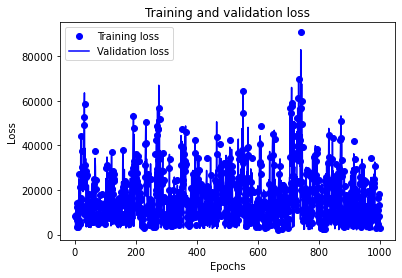

In [35]:
### Training and validation graph
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['val_loss']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1000,) and (1,)

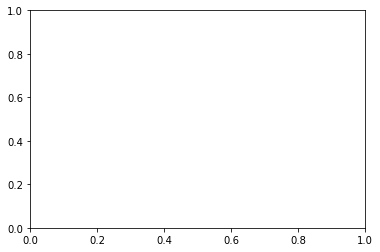

In [34]:
### Training and validation accuracy graph
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, accuracy, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()